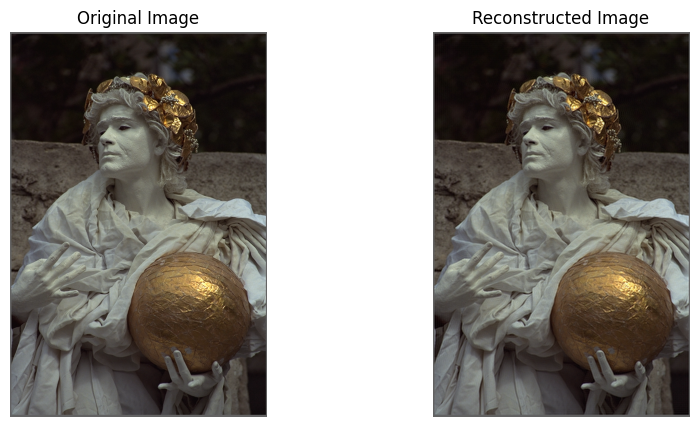

Original image size: 587.97 KB
Reconstructed image size: 119.94 KB


In [1]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
import os


#Two-dimensional Discrete Cosine Transform 
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

#Two-dimensional Inverse Discrete Cosine Transform
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')



# Load RGB image
img = cv2.imread('kodim17.png')  # OpenCV loads as BGR by default
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)


# Process each channel
reconstructed_channels = []
keep_ratio = 0.50  #Percentage of frequency componenets to keep

#For each channel
for i in range(3):  
    channel = img[:, :, i]
    dct_channel = dct2(channel)

    # Low-frequency mask
    h, w = dct_channel.shape
    mask = np.zeros_like(dct_channel)
    mask[:int(h * keep_ratio), :int(w * keep_ratio)] = 1

    # Zero out high frequencies
    dct_low = dct_channel * mask

    # Reconstruct channel
    rec_channel = idct2(dct_low)
    rec_channel = np.clip(rec_channel, 0, 255)
    reconstructed_channels.append(rec_channel)


# Merge channels
reconstructed_img = np.stack(reconstructed_channels, axis=2).astype(np.uint8)

# Save reconstructed image
cv2.imwrite('kodim_compressed.jpg', cv2.cvtColor(reconstructed_img, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img.astype(np.uint8))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_img)
plt.axis('off')

plt.show()

# Original image
original_path = "kodim17.png"
original_size = os.path.getsize(original_path)  # size in bytes
print(f"Original image size: {original_size / 1024:.2f} KB")

# Reconstructed image
reconstructed_path = "kodim_compressed.jpg"
reconstructed_size = os.path.getsize(reconstructed_path)
print(f"Reconstructed image size: {reconstructed_size / 1024:.2f} KB")
